In [1]:
import sys

dirname = "/Users/muhammaddaffarobani/Documents/personal_research/smt"
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.applications.explainability_tools import (
    PartialDependenceDisplay,
    PDFeatureImportanceDisplay,
    PDFeatureInteractionDisplay,
    ShapFeatureImportanceDisplay,
    ShapDisplay,
)

# Creating the model

In [2]:
ndoe = 300
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion="ese", random_state=1)
X = sampling(ndoe)
y = fun(X)

n_train = int(0.8 * ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

## config
feature_names = [
    r"$S_{w}$",
    r"$W_{fw}$",
    r"$A$",
    r"$\Delta$",
    r"$q$",
    r"$\lambda$",
    r"$t_{c}$",
    r"$N_{z}$",
    r"$W_{dg}$",
    r"$W_{p}$",
]

In [3]:
class GroundTruthModel:
    def predict_values(self, X):
        return fun(X)

In [4]:
%%time
# sm = KRG(
#     theta0=[1e-2]*X_tr.shape[1],
#     print_prediction = False
#     )
# sm.set_training_values(
#     X_tr,
#     y_tr
#     )

# sm.train()

# print("Surrogate model")
# y_pred = sm.predict_values(X_te)
# rmse = mean_squared_error(y_te, y_pred, squared=False)
# rrmse = rmse / y_te.mean()
# print(f"RMSE: {rmse:.4f}")
# print(f"rRMSE: {rrmse:.4f}")

print("Ground truth model")
gtm = GroundTruthModel()
y_pred = gtm.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

Ground truth model
RMSE: 0.0000
rRMSE: 0.0000
CPU times: user 1.46 ms, sys: 198 µs, total: 1.65 ms
Wall time: 1.7 ms


# Feature importance

## PDP

Using `PDFeatureImportanceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 

- Config parameters:
    - feature_names: name of the features for the axis. 
    - sorted: if True, sort the features based on the feature importance. 

CPU times: user 1min 2s, sys: 19 s, total: 1min 21s
Wall time: 20.7 s


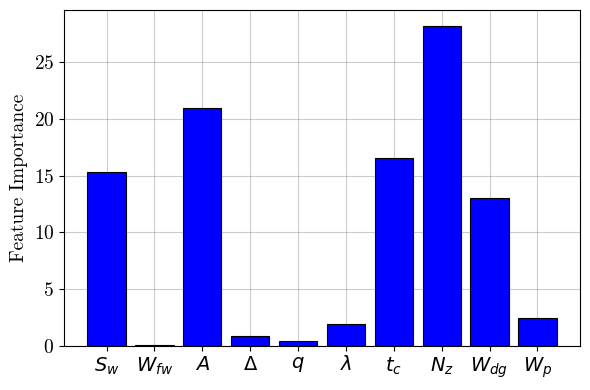

In [6]:
%%time
model = sm
X = X_tr

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    sm,
    X,
    feature_names=feature_names,
)

## SHAP

Using `ShapFeatureImportanceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 

- Config parameters:
    - feature_names: name of the features for the axis. 
    - sort: if True, sort the features based on the feature importance. 

CPU times: user 5min 49s, sys: 48.4 s, total: 6min 37s
Wall time: 1min 42s


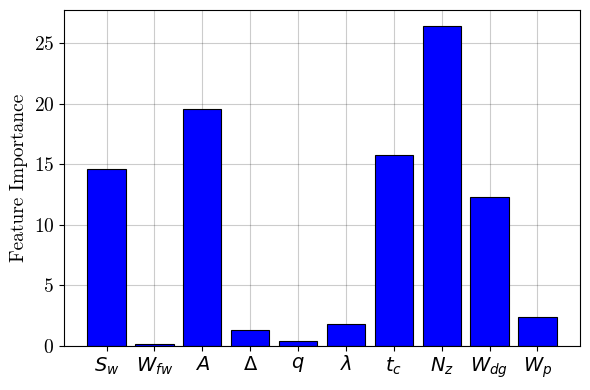

In [7]:
%%time
model = sm
X = X_tr

feature_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model,
    X,
    feature_names=feature_names,
)

CPU times: user 1.02 s, sys: 11.2 ms, total: 1.03 s
Wall time: 1.13 s


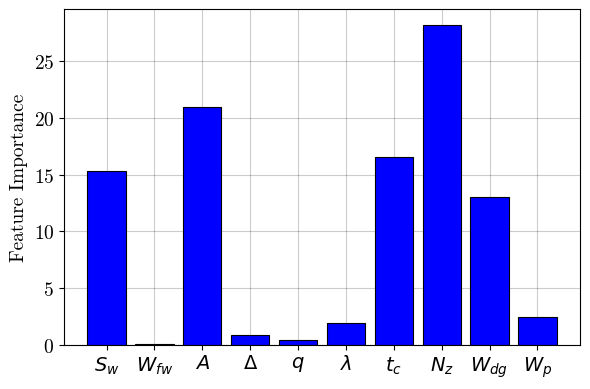

In [8]:
%%time
model = gtm
X = X_tr

feature_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model,
    X,
    feature_names=feature_names,
)

CPU times: user 4min 1s, sys: 26.7 s, total: 4min 28s
Wall time: 1min 8s


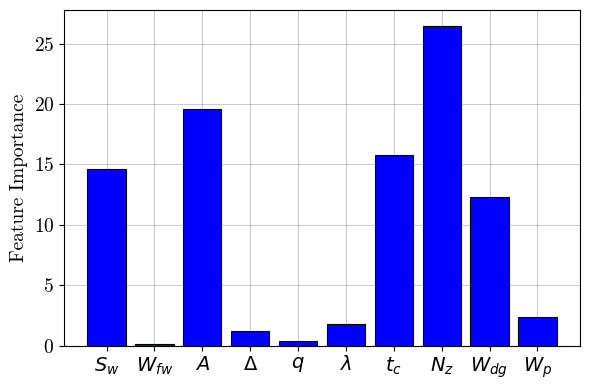

In [9]:
%%time
model = gtm
X = X_tr

feature_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model,
    X_tr,
    feature_names=feature_names,
)

# Feature interaction

## Overall interaction

Using `PDFeatureInteractionDisplay.overall_interaction` method. 
- Required parameters:
    - model: surrogate model.
    - X: input spaces as a reference to compute the interaction. 

- Config parameters:
    - categorical_features: list of categorical features index. this is crucial for the computation.
    - feature_names: name of the features for the axis. 
    - ratio_samples: ratio of samples to be used for computing the feature interaction. 
    - sorted: if True, sort the features based on the feature importance. 



CPU times: user 4min 56s, sys: 1min 28s, total: 6min 25s
Wall time: 1min 35s


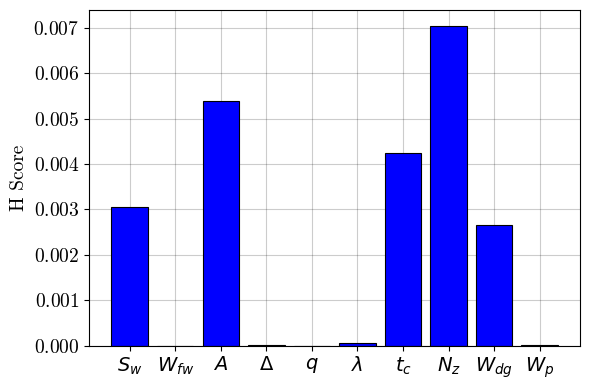

In [10]:
%%time
model = sm
X = X_tr

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X,
    feature_names=feature_names,
)

CPU times: user 4.4 s, sys: 45.3 ms, total: 4.45 s
Wall time: 5.53 s


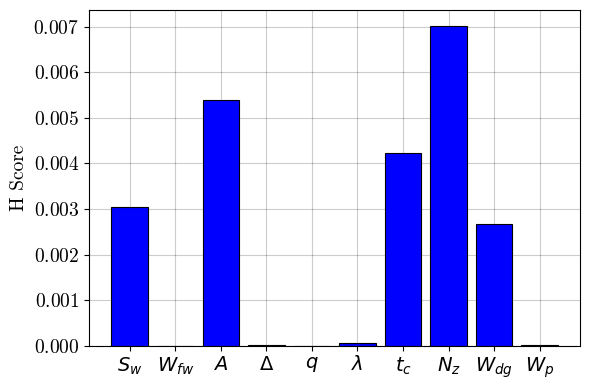

In [11]:
%%time
model = gtm
X = X_tr

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X,
    feature_names=feature_names,
)

## Pairwise interaction

Using `PDFeatureInteractionDisplay.pairwise_interaction` method. 
- Required parameters:
    - model: surrogate model.
    - X: input spaces as a reference to compute the interaction. 
    - feature_pairs: pair of features to compute the interaction

- Config parameters:
    - categorical_features: list of categorical features index. this is crucial for the computation.
    - feature_names: name of the features for the axis. 
    - ratio_samples: ratio of samples to be used for computing the feature interaction. 
    - sorted: if True, sort the features based on the feature importance. 



CPU times: user 6min 36s, sys: 2min 9s, total: 8min 45s
Wall time: 2min 10s


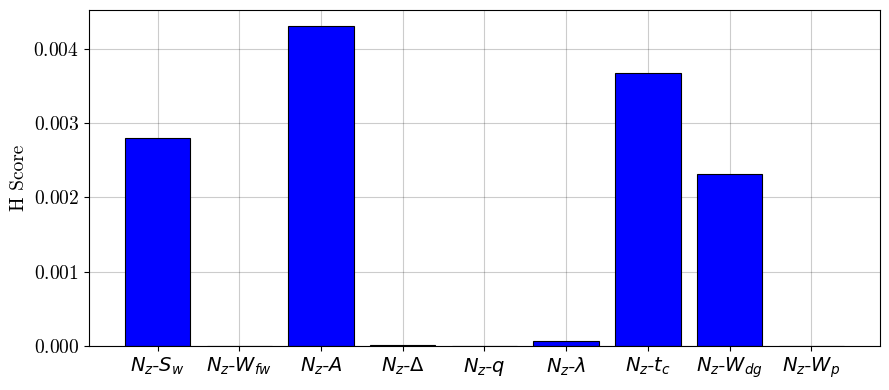

In [12]:
%%time
model = sm
X = X_tr
features = [i for i in range(X_tr.shape[1])]
feature_i = 7
feature_pairs = [
    (feature_i, feature_j) for feature_j in features if feature_j != feature_i
]

pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X,
    feature_pairs,
    feature_names=feature_names,
)

CPU times: user 5.85 s, sys: 104 ms, total: 5.96 s
Wall time: 6.93 s


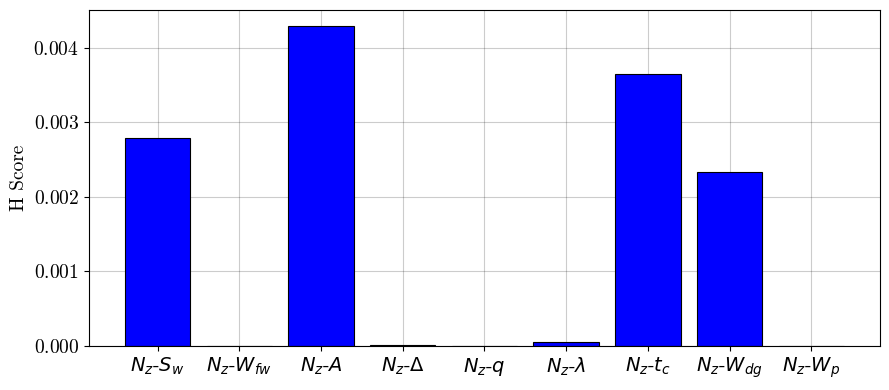

In [13]:
%%time
model = gtm
X = X_tr
features = [i for i in range(X_tr.shape[1])]
feature_i = 7
feature_pairs = [
    (feature_i, feature_j) for feature_j in features if feature_j != feature_i
]

pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X,
    feature_pairs,
    feature_names=feature_names,
)

# Dependence plot

## 1 Dimension

### PDP

Using `PartialDependenceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 
    - features: list of feature indexes to create the partial dependence plot on, i.e., y vs x_{i}.

- Config parameters:
    - kind: "average" for creating average dependence plot, "individual" for creating individual plots, "both" for plotting average and individual.
    - centered: if True, the partial dependence plot starts from zero. 
    - grid_resolution: Resolution of the feature values. 
    - feature_names: name of the features for the axis. 
    - percentiles: start and end percentile of each feature when creating the plot. 


CPU times: user 1min 13s, sys: 12.7 s, total: 1min 25s
Wall time: 22.7 s


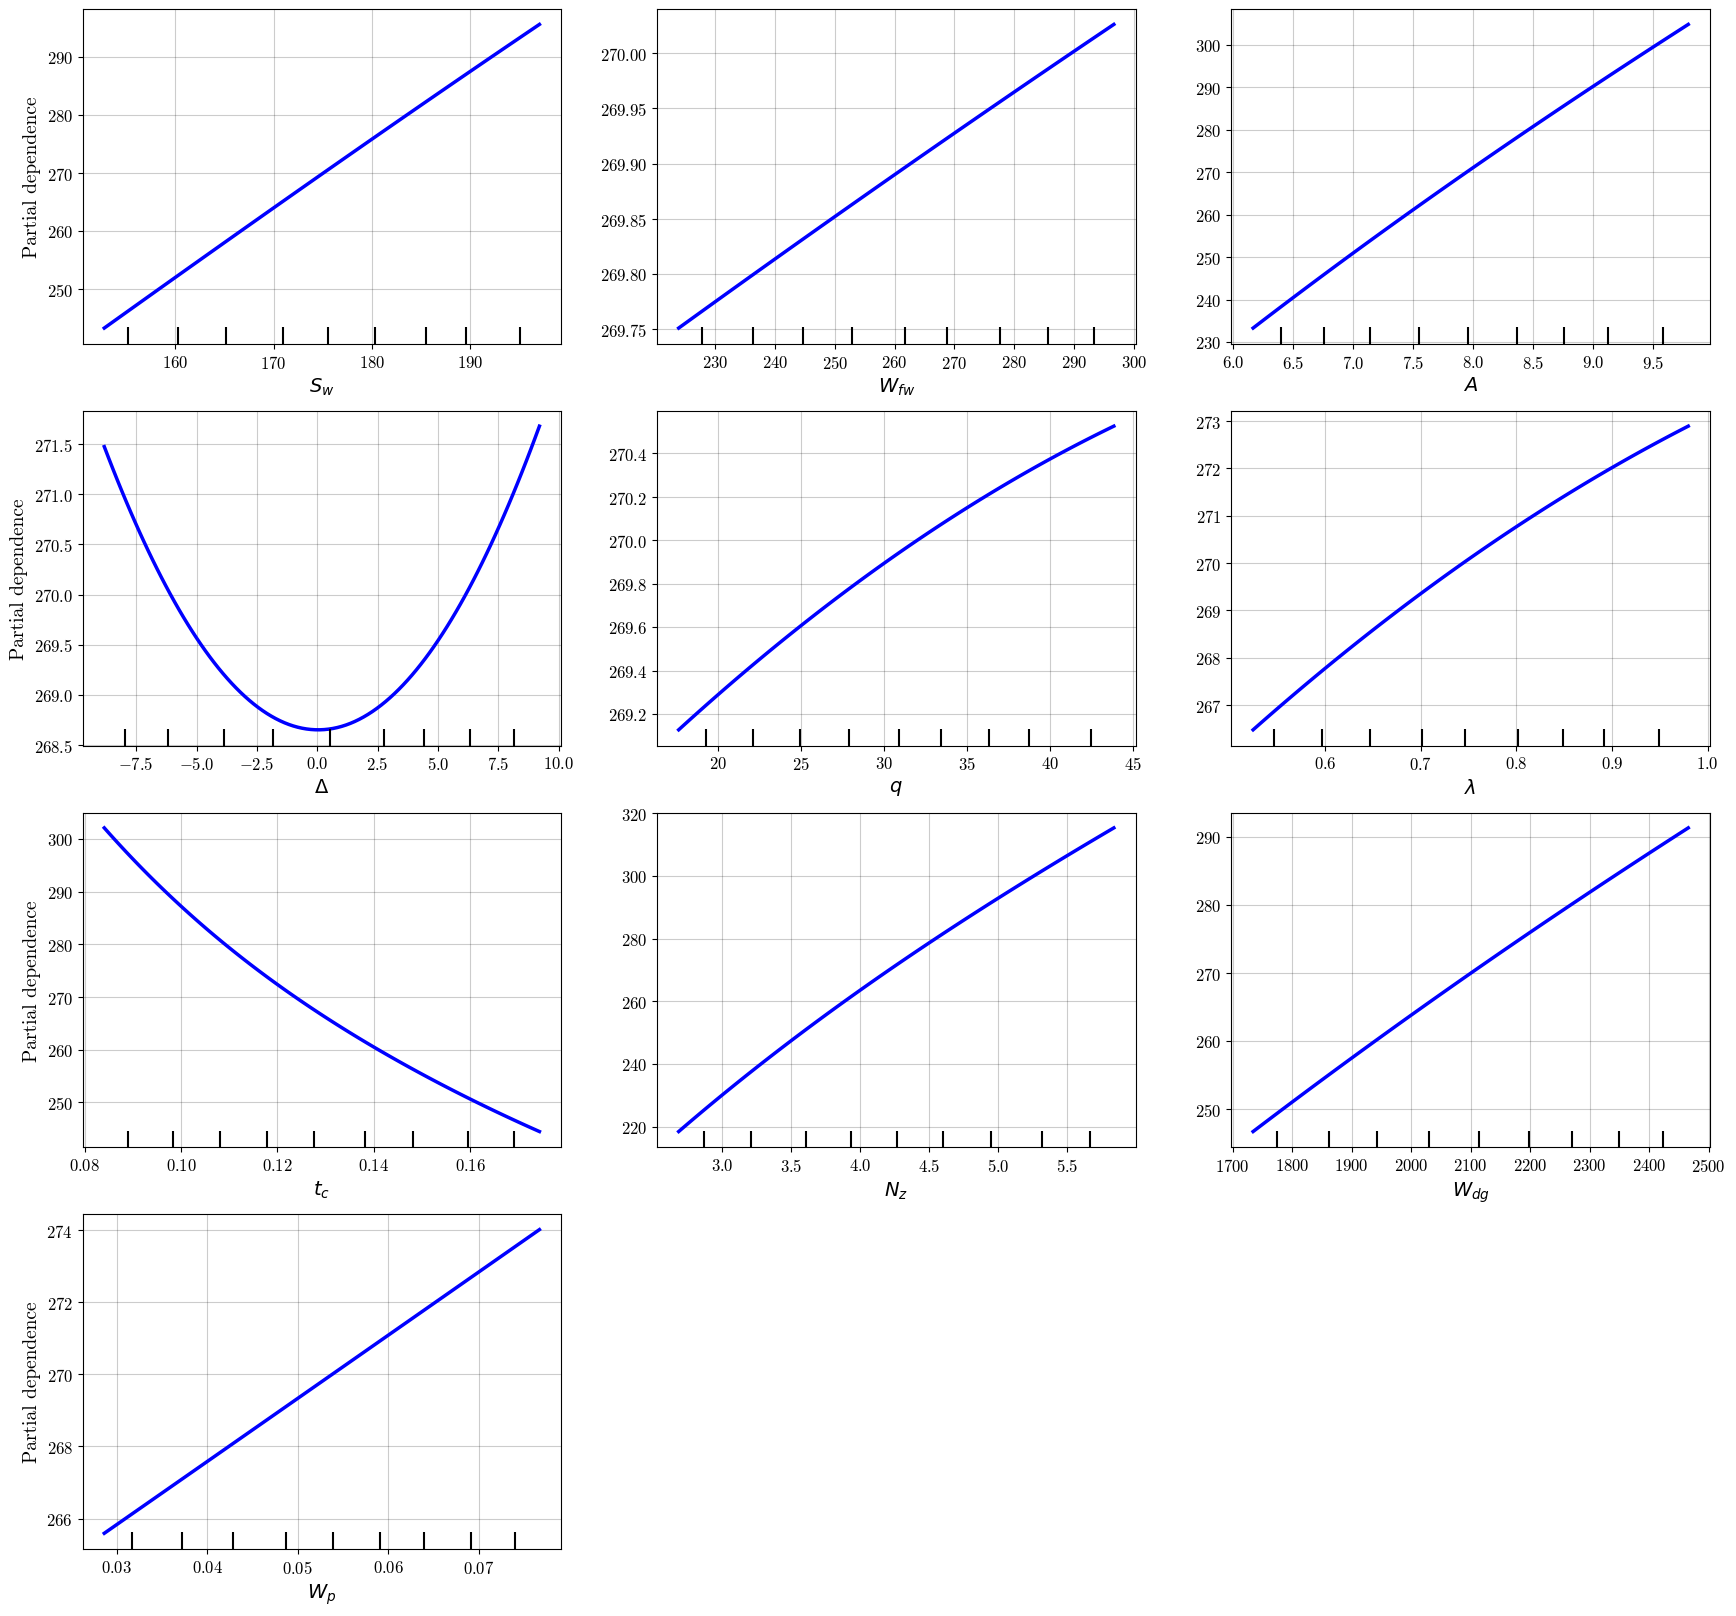

In [14]:
%%time
model = sm
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=100,
    kind="average",
    feature_names=feature_names,
    centered=False,
)

CPU times: user 1min 17s, sys: 10.8 s, total: 1min 28s
Wall time: 23.9 s


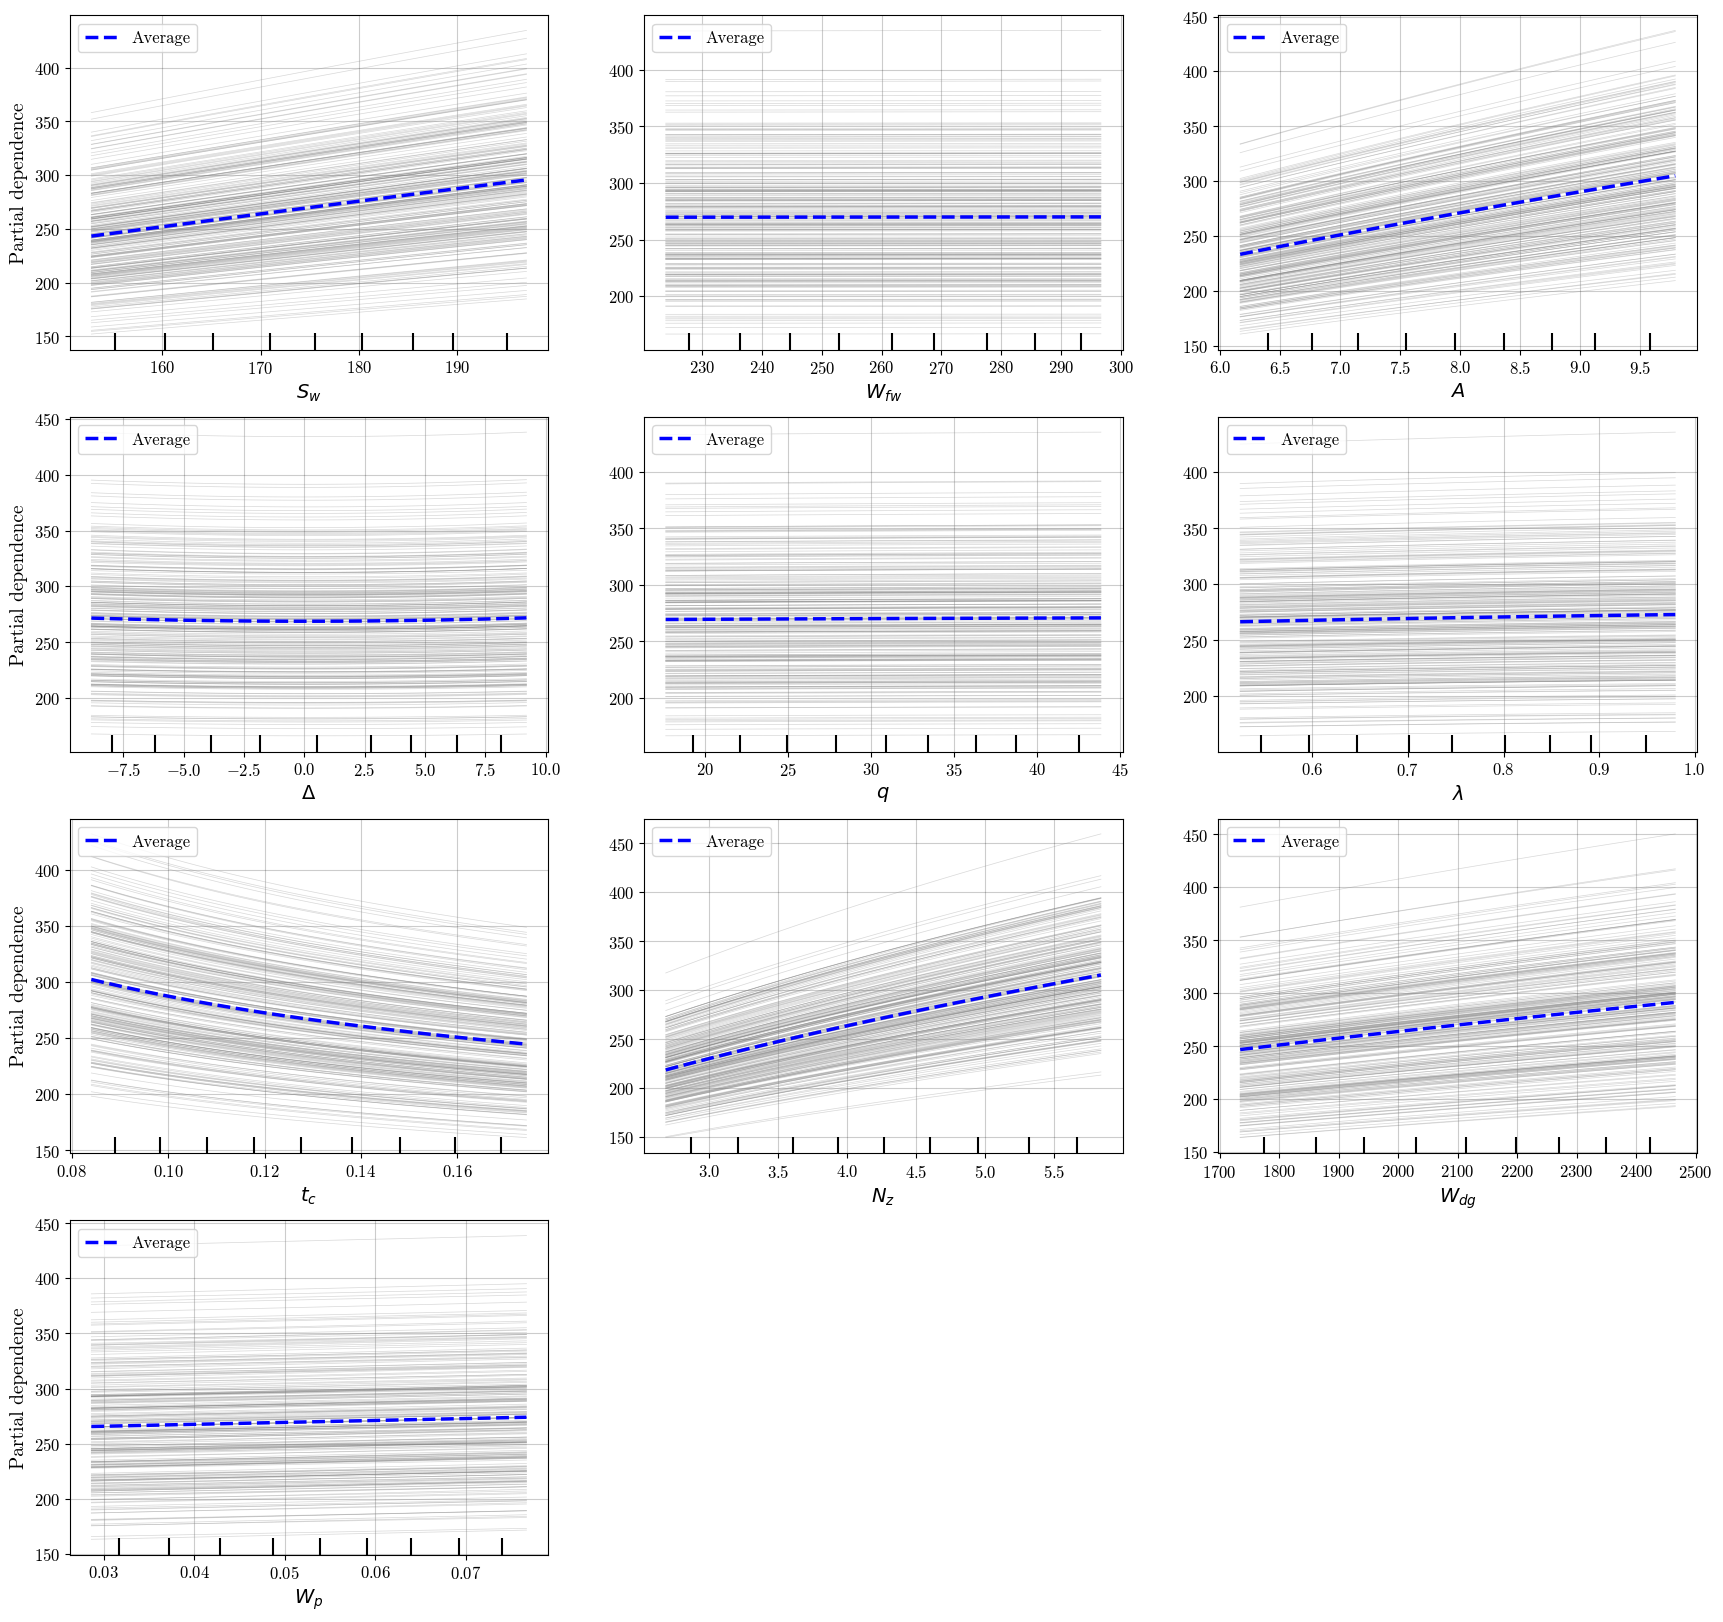

In [15]:
%%time
model = sm
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=100,
    kind="both",
    feature_names=feature_names,
    centered=False,
)

CPU times: user 1min 15s, sys: 13.4 s, total: 1min 28s
Wall time: 23.3 s


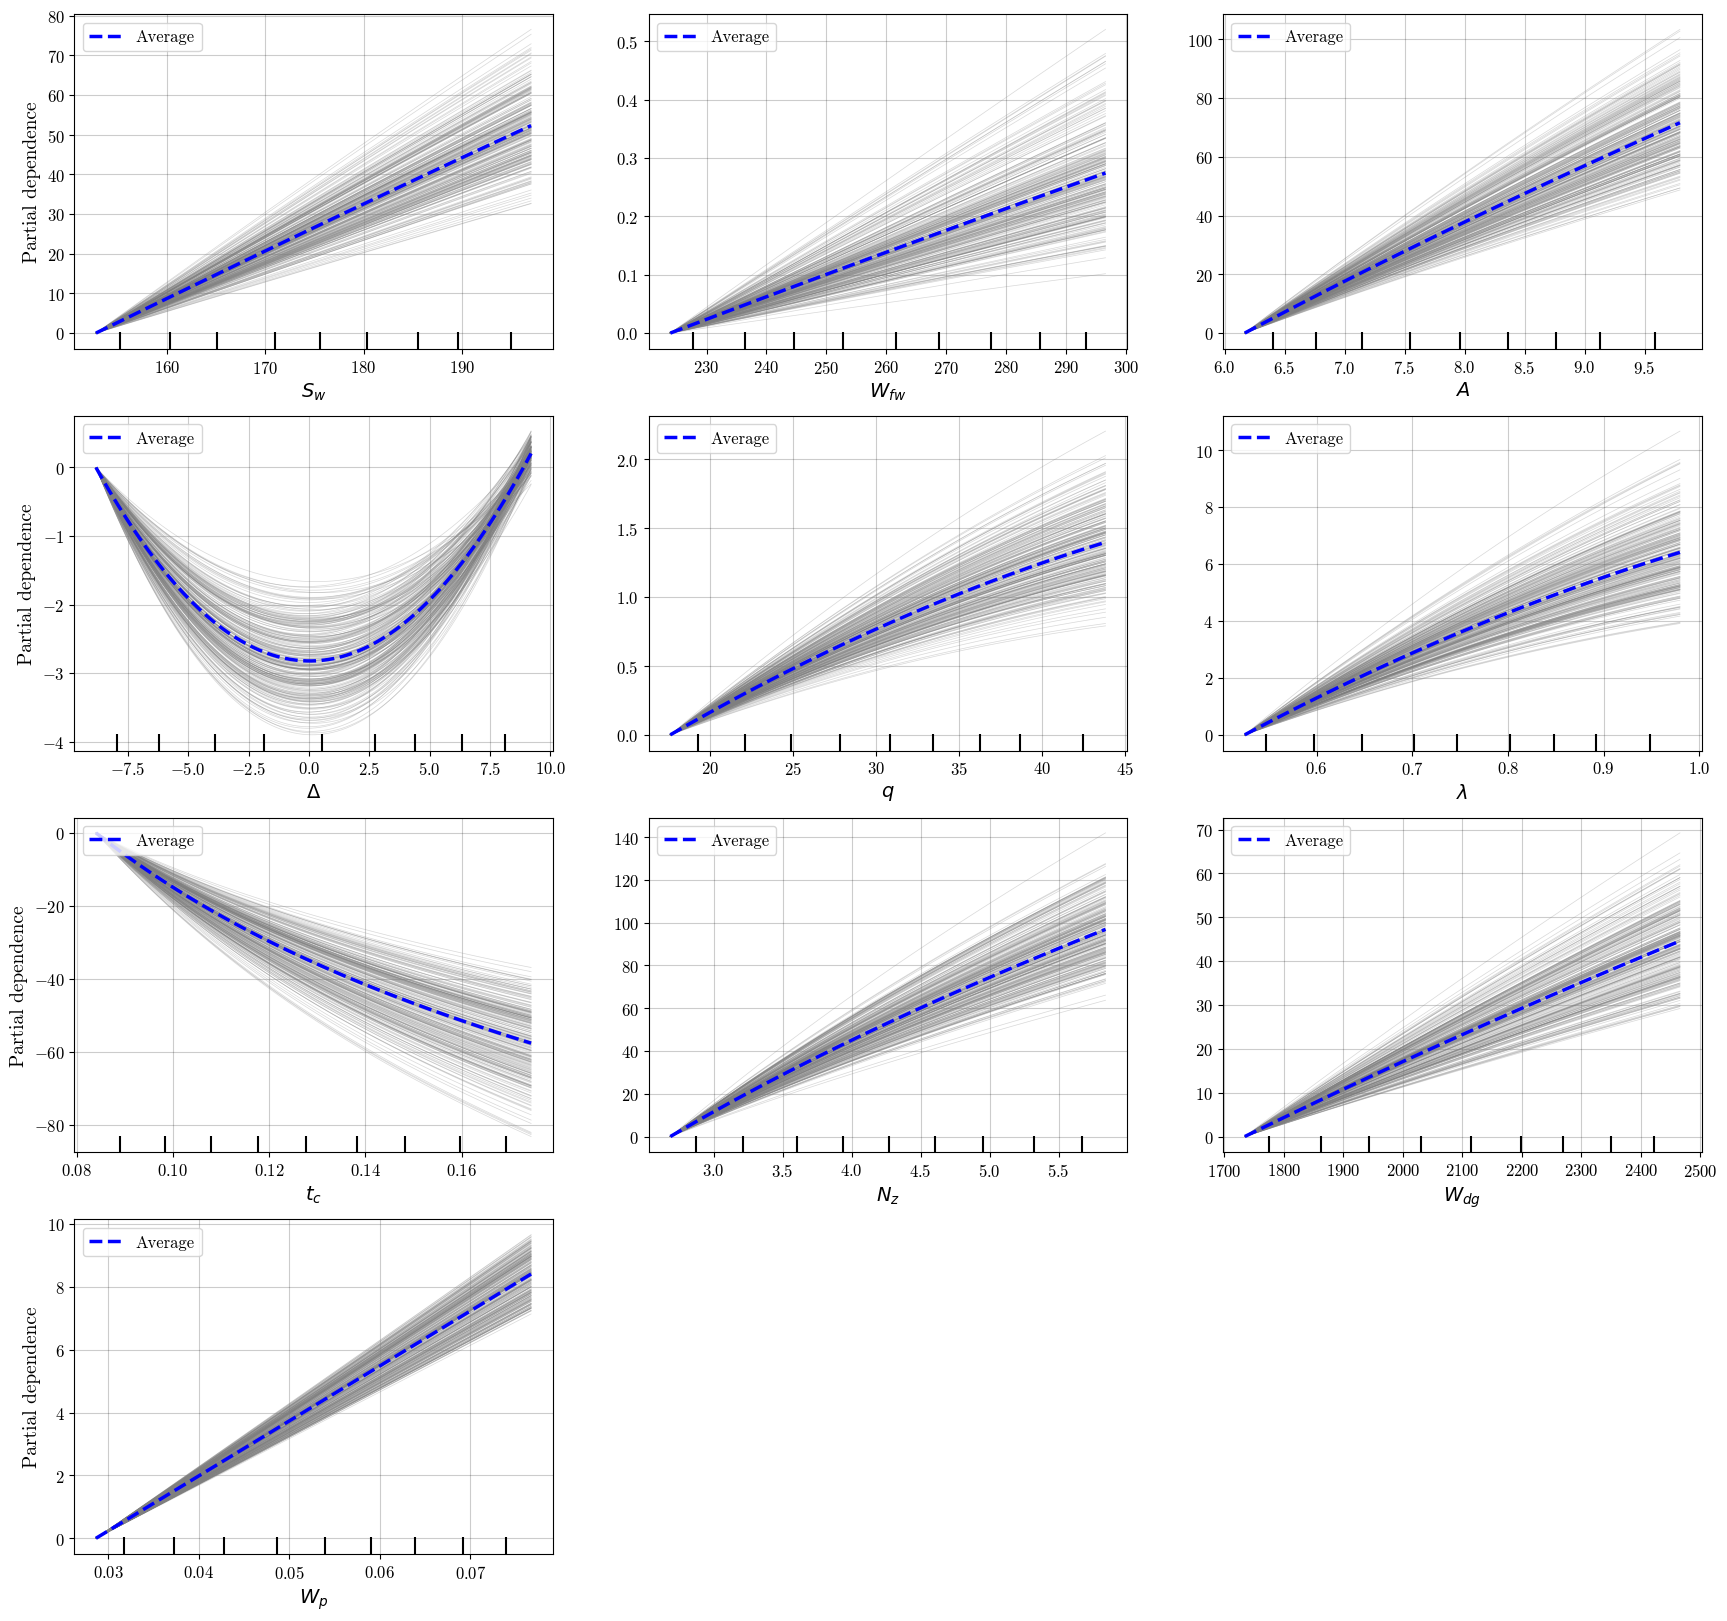

In [16]:
%%time
model = sm
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=100,
    kind="both",
    feature_names=feature_names,
    centered=True,
)

CPU times: user 1.09 s, sys: 35.9 ms, total: 1.13 s
Wall time: 1.14 s


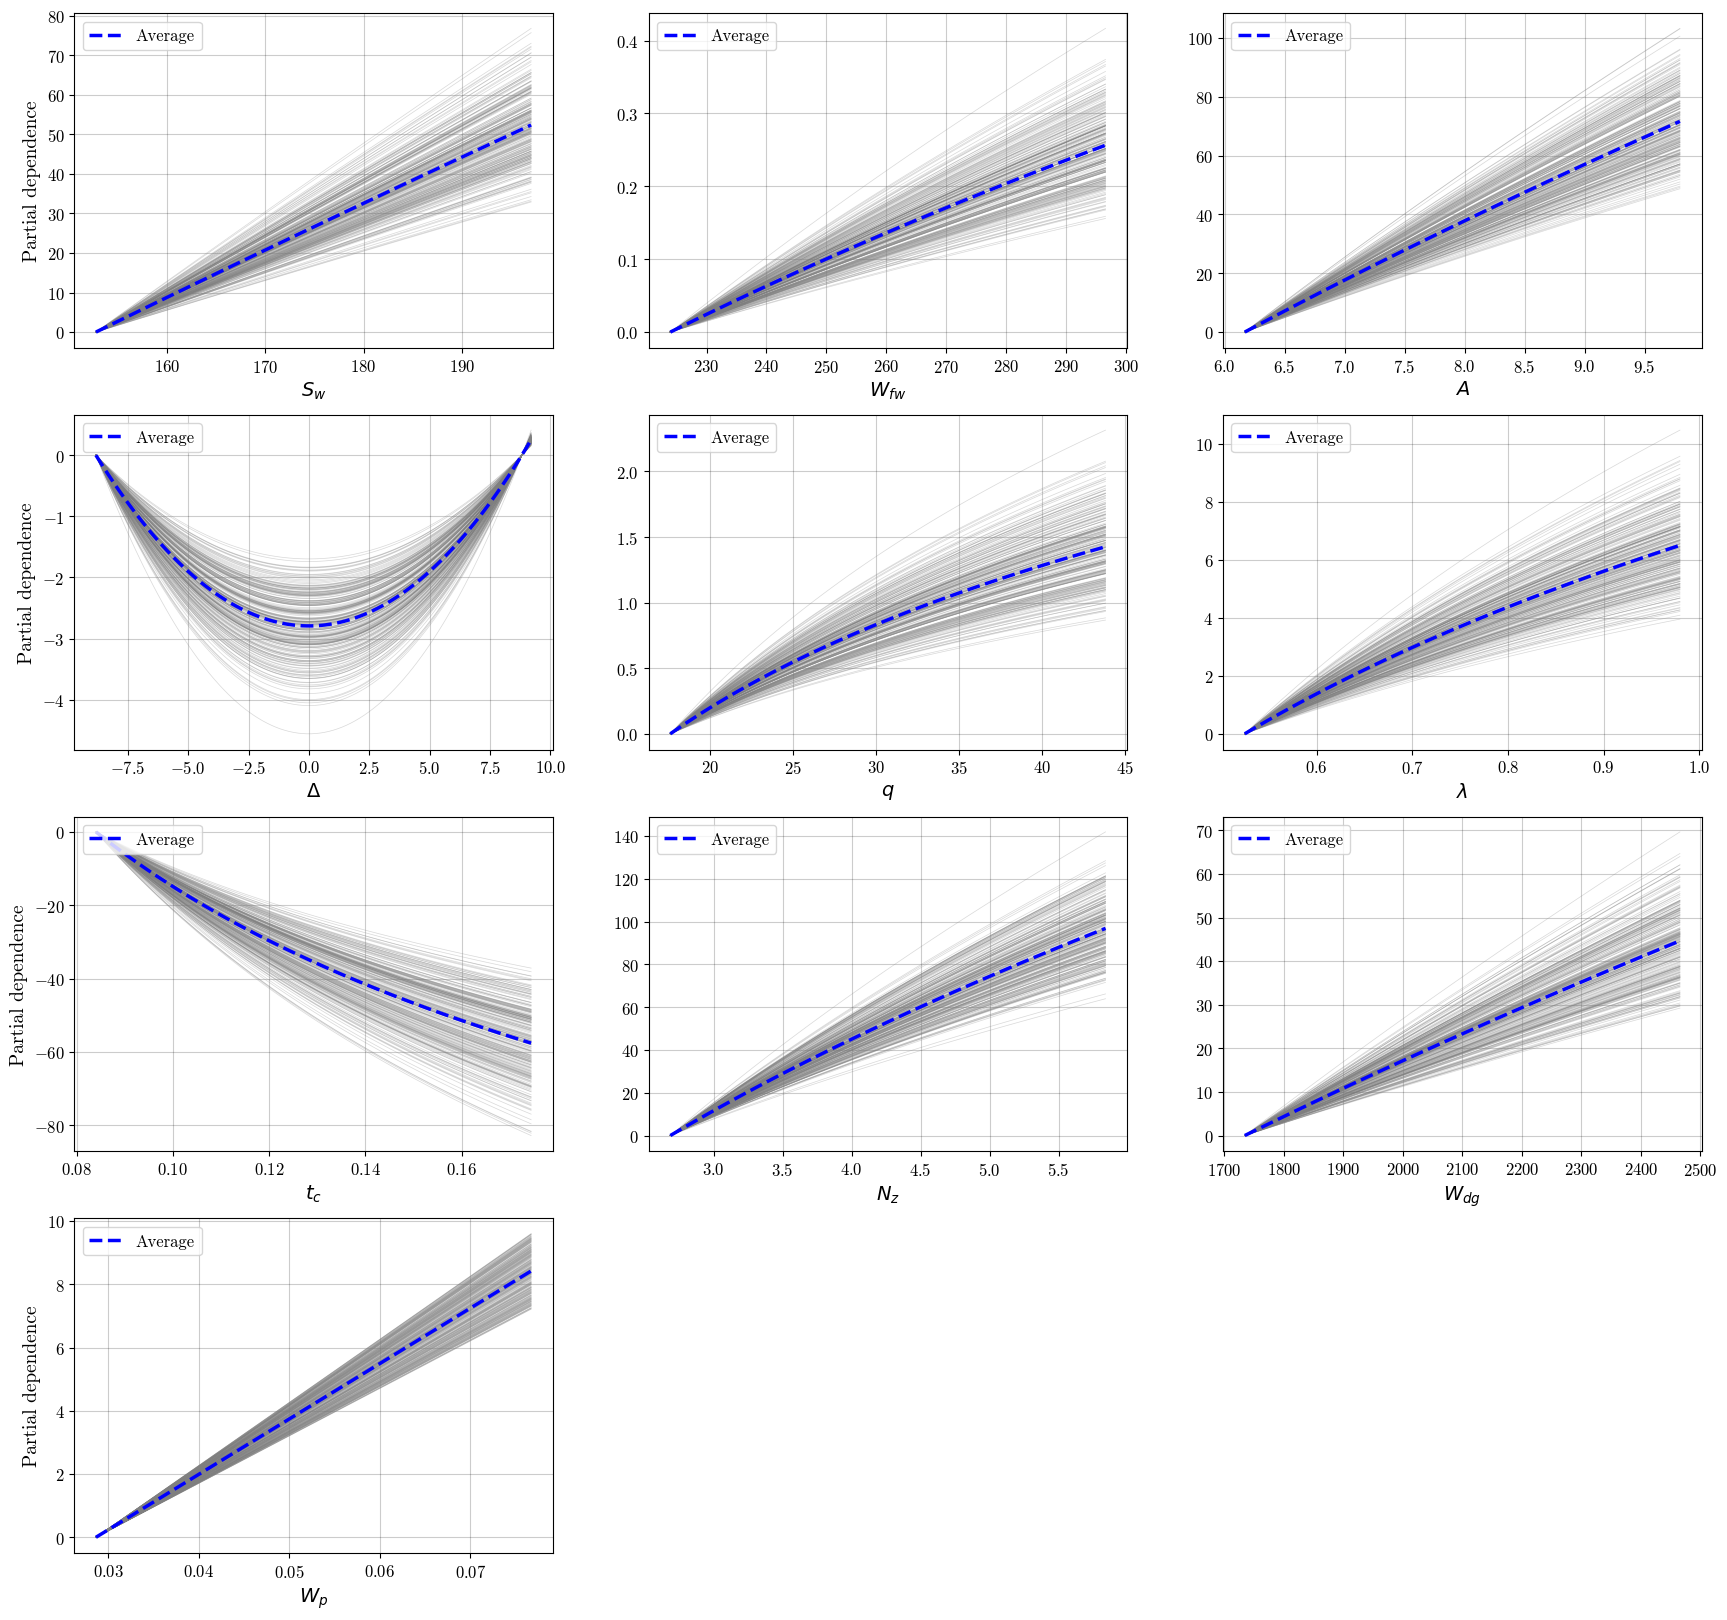

In [5]:
%%time
model = gtm
X = X_tr
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=100,
    kind="both",
    feature_names=feature_names,
    centered=True,
)

CPU times: user 25.2 s, sys: 5.14 s, total: 30.4 s
Wall time: 7.7 s


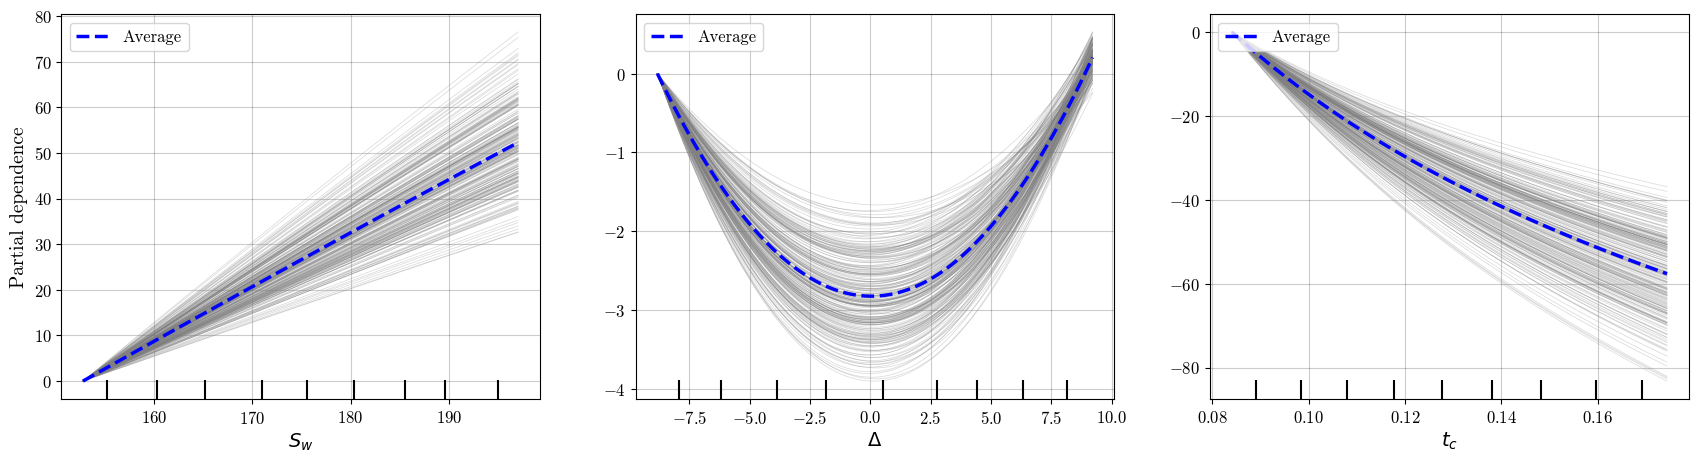

In [18]:
%%time
model = sm
X = X_tr
features = [0, 3, 6]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=100,
    kind="both",
    feature_names=feature_names,
    centered=True,
)

### SHAP

In [19]:
%%time
instances = X_tr
model = sm
X = X_tr
explainer_train = ShapDisplay.from_surrogate_model(
    instances,
    model,
    X,
    feature_names=feature_names,
)

CPU times: user 5min 18s, sys: 44.3 s, total: 6min 2s
Wall time: 1min 31s


In [20]:
%%time
instances = X_tr
model = gtm
X = X_tr
explainer_train_true = ShapDisplay.from_surrogate_model(
    instances,
    model,
    X,
    feature_names=feature_names,
)

CPU times: user 4min 11s, sys: 24.7 s, total: 4min 36s
Wall time: 1min 10s


CPU times: user 2.57 s, sys: 245 ms, total: 2.82 s
Wall time: 2.07 s


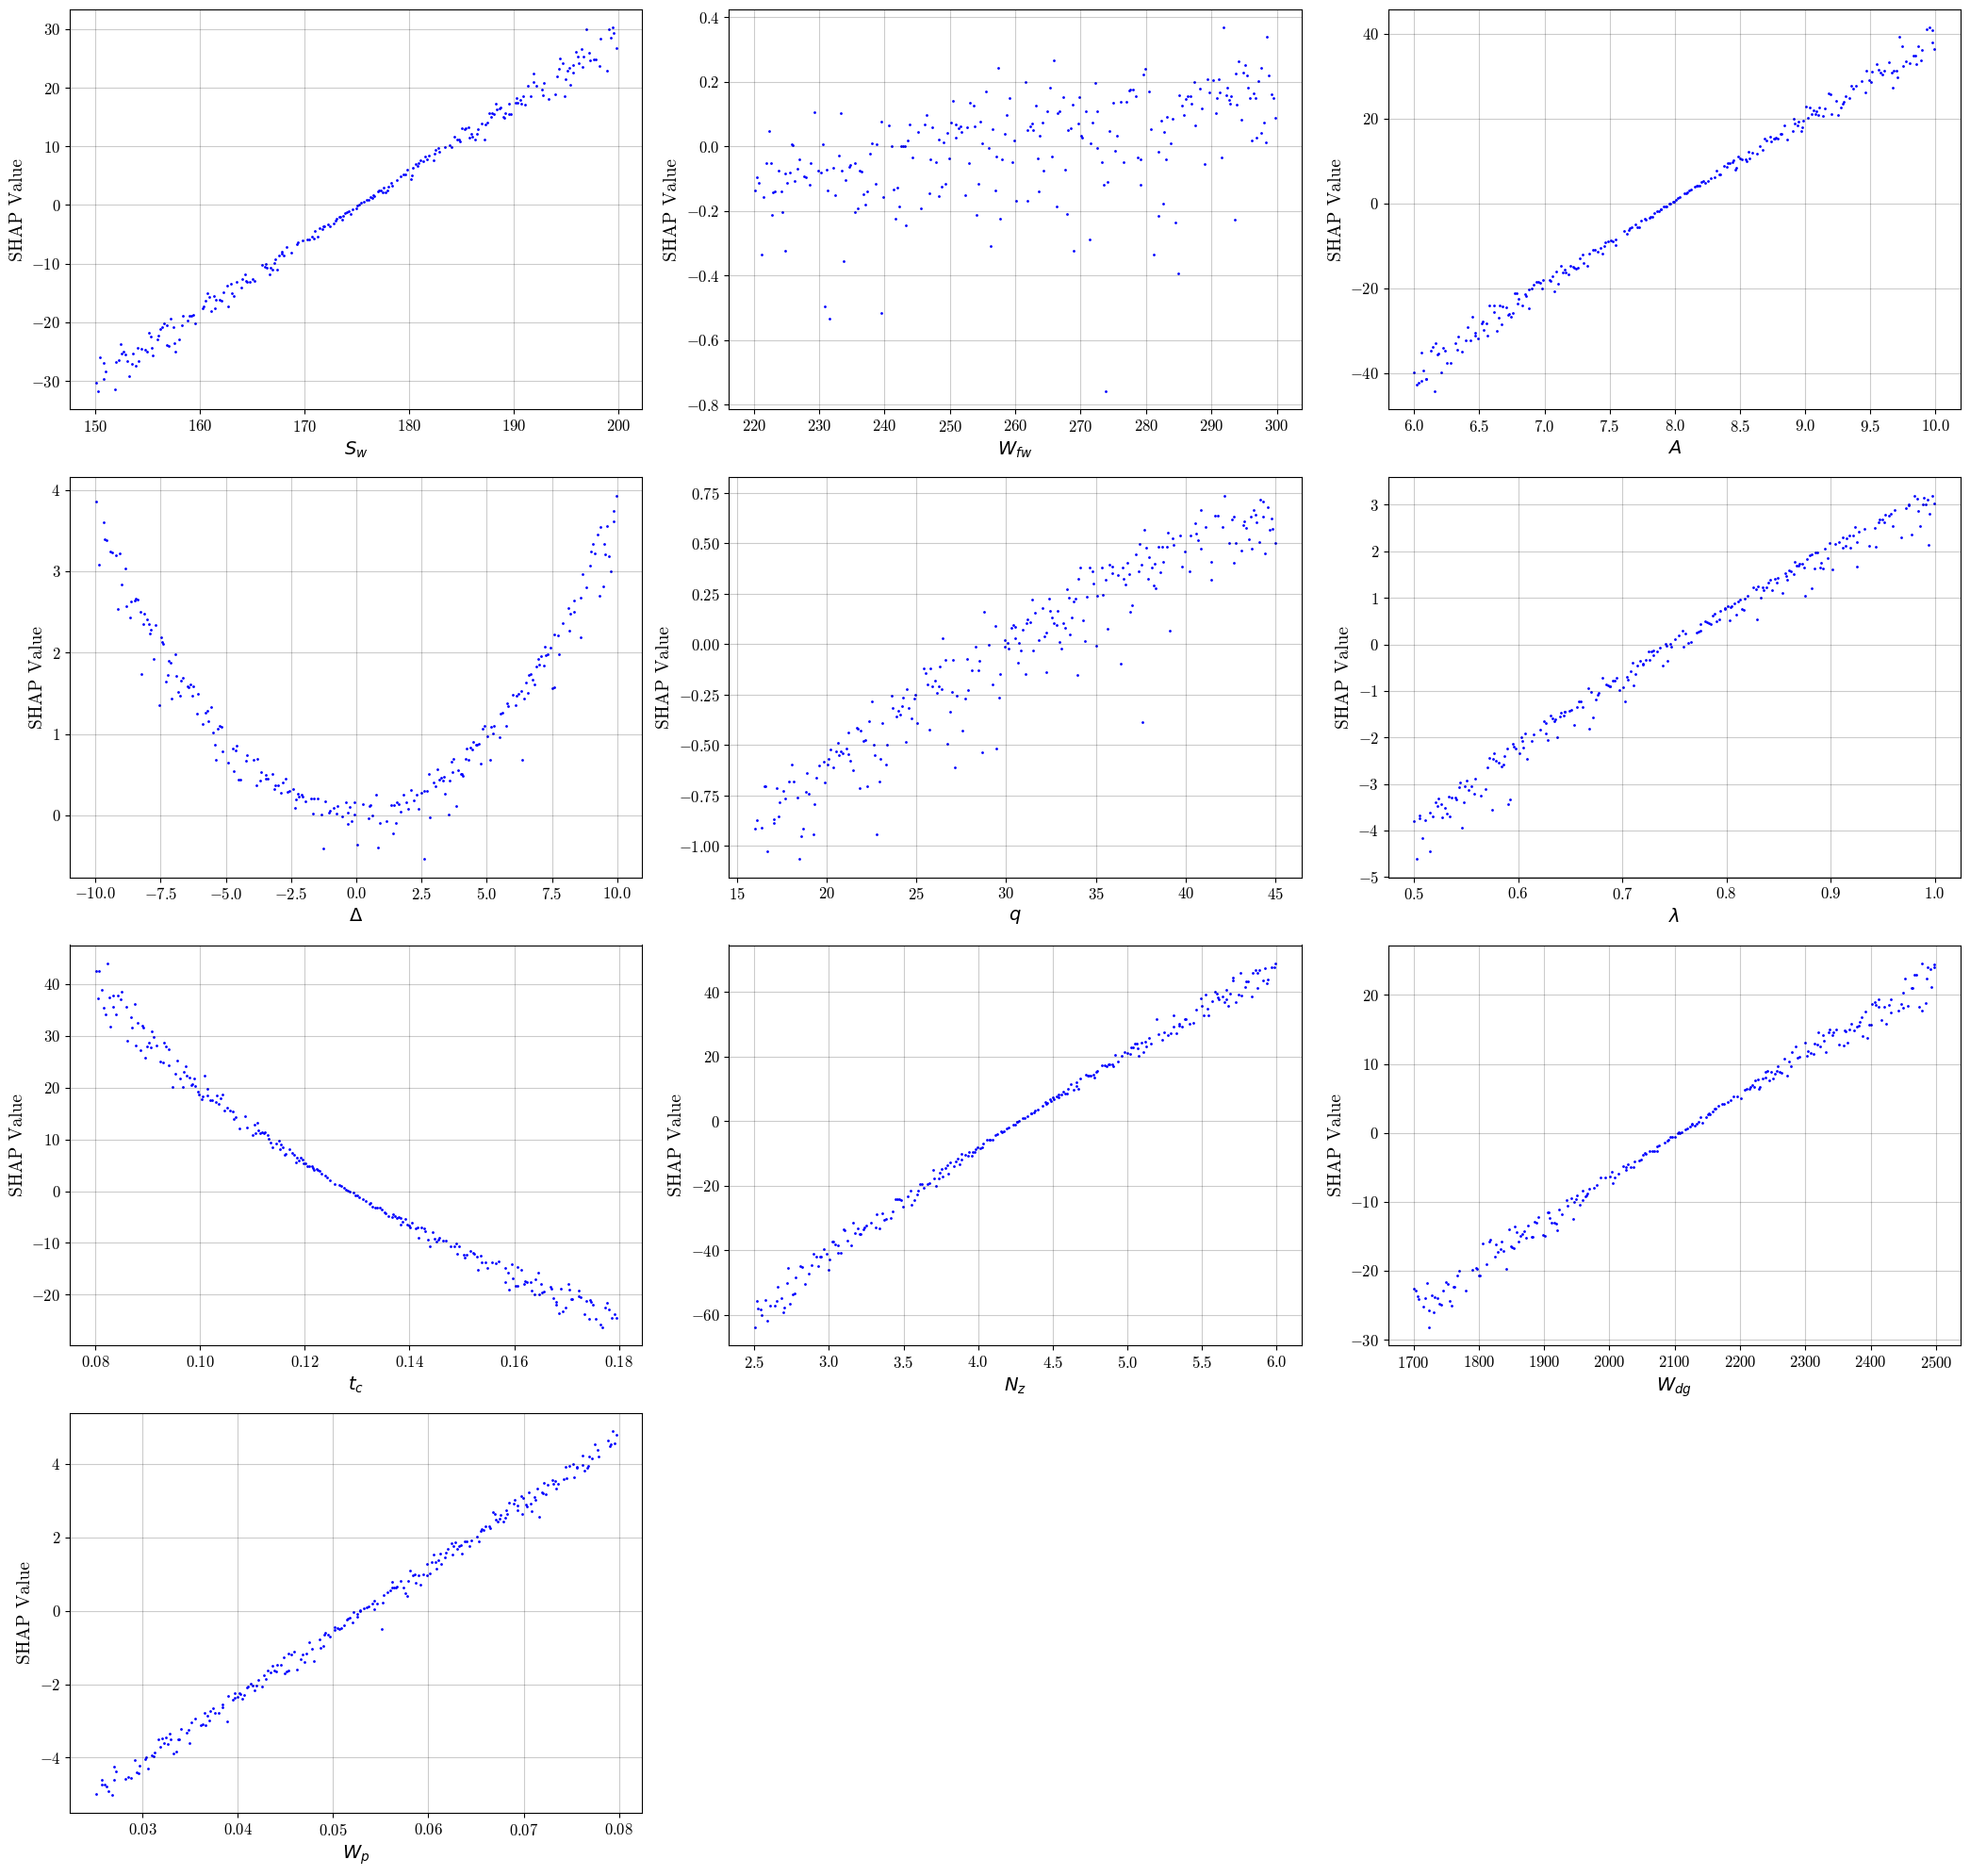

In [21]:
%%time
features = [i for i in range(X_tr.shape[1])]

explainer_train.dependence_plot(features)

CPU times: user 1.92 s, sys: 183 ms, total: 2.1 s
Wall time: 1.81 s


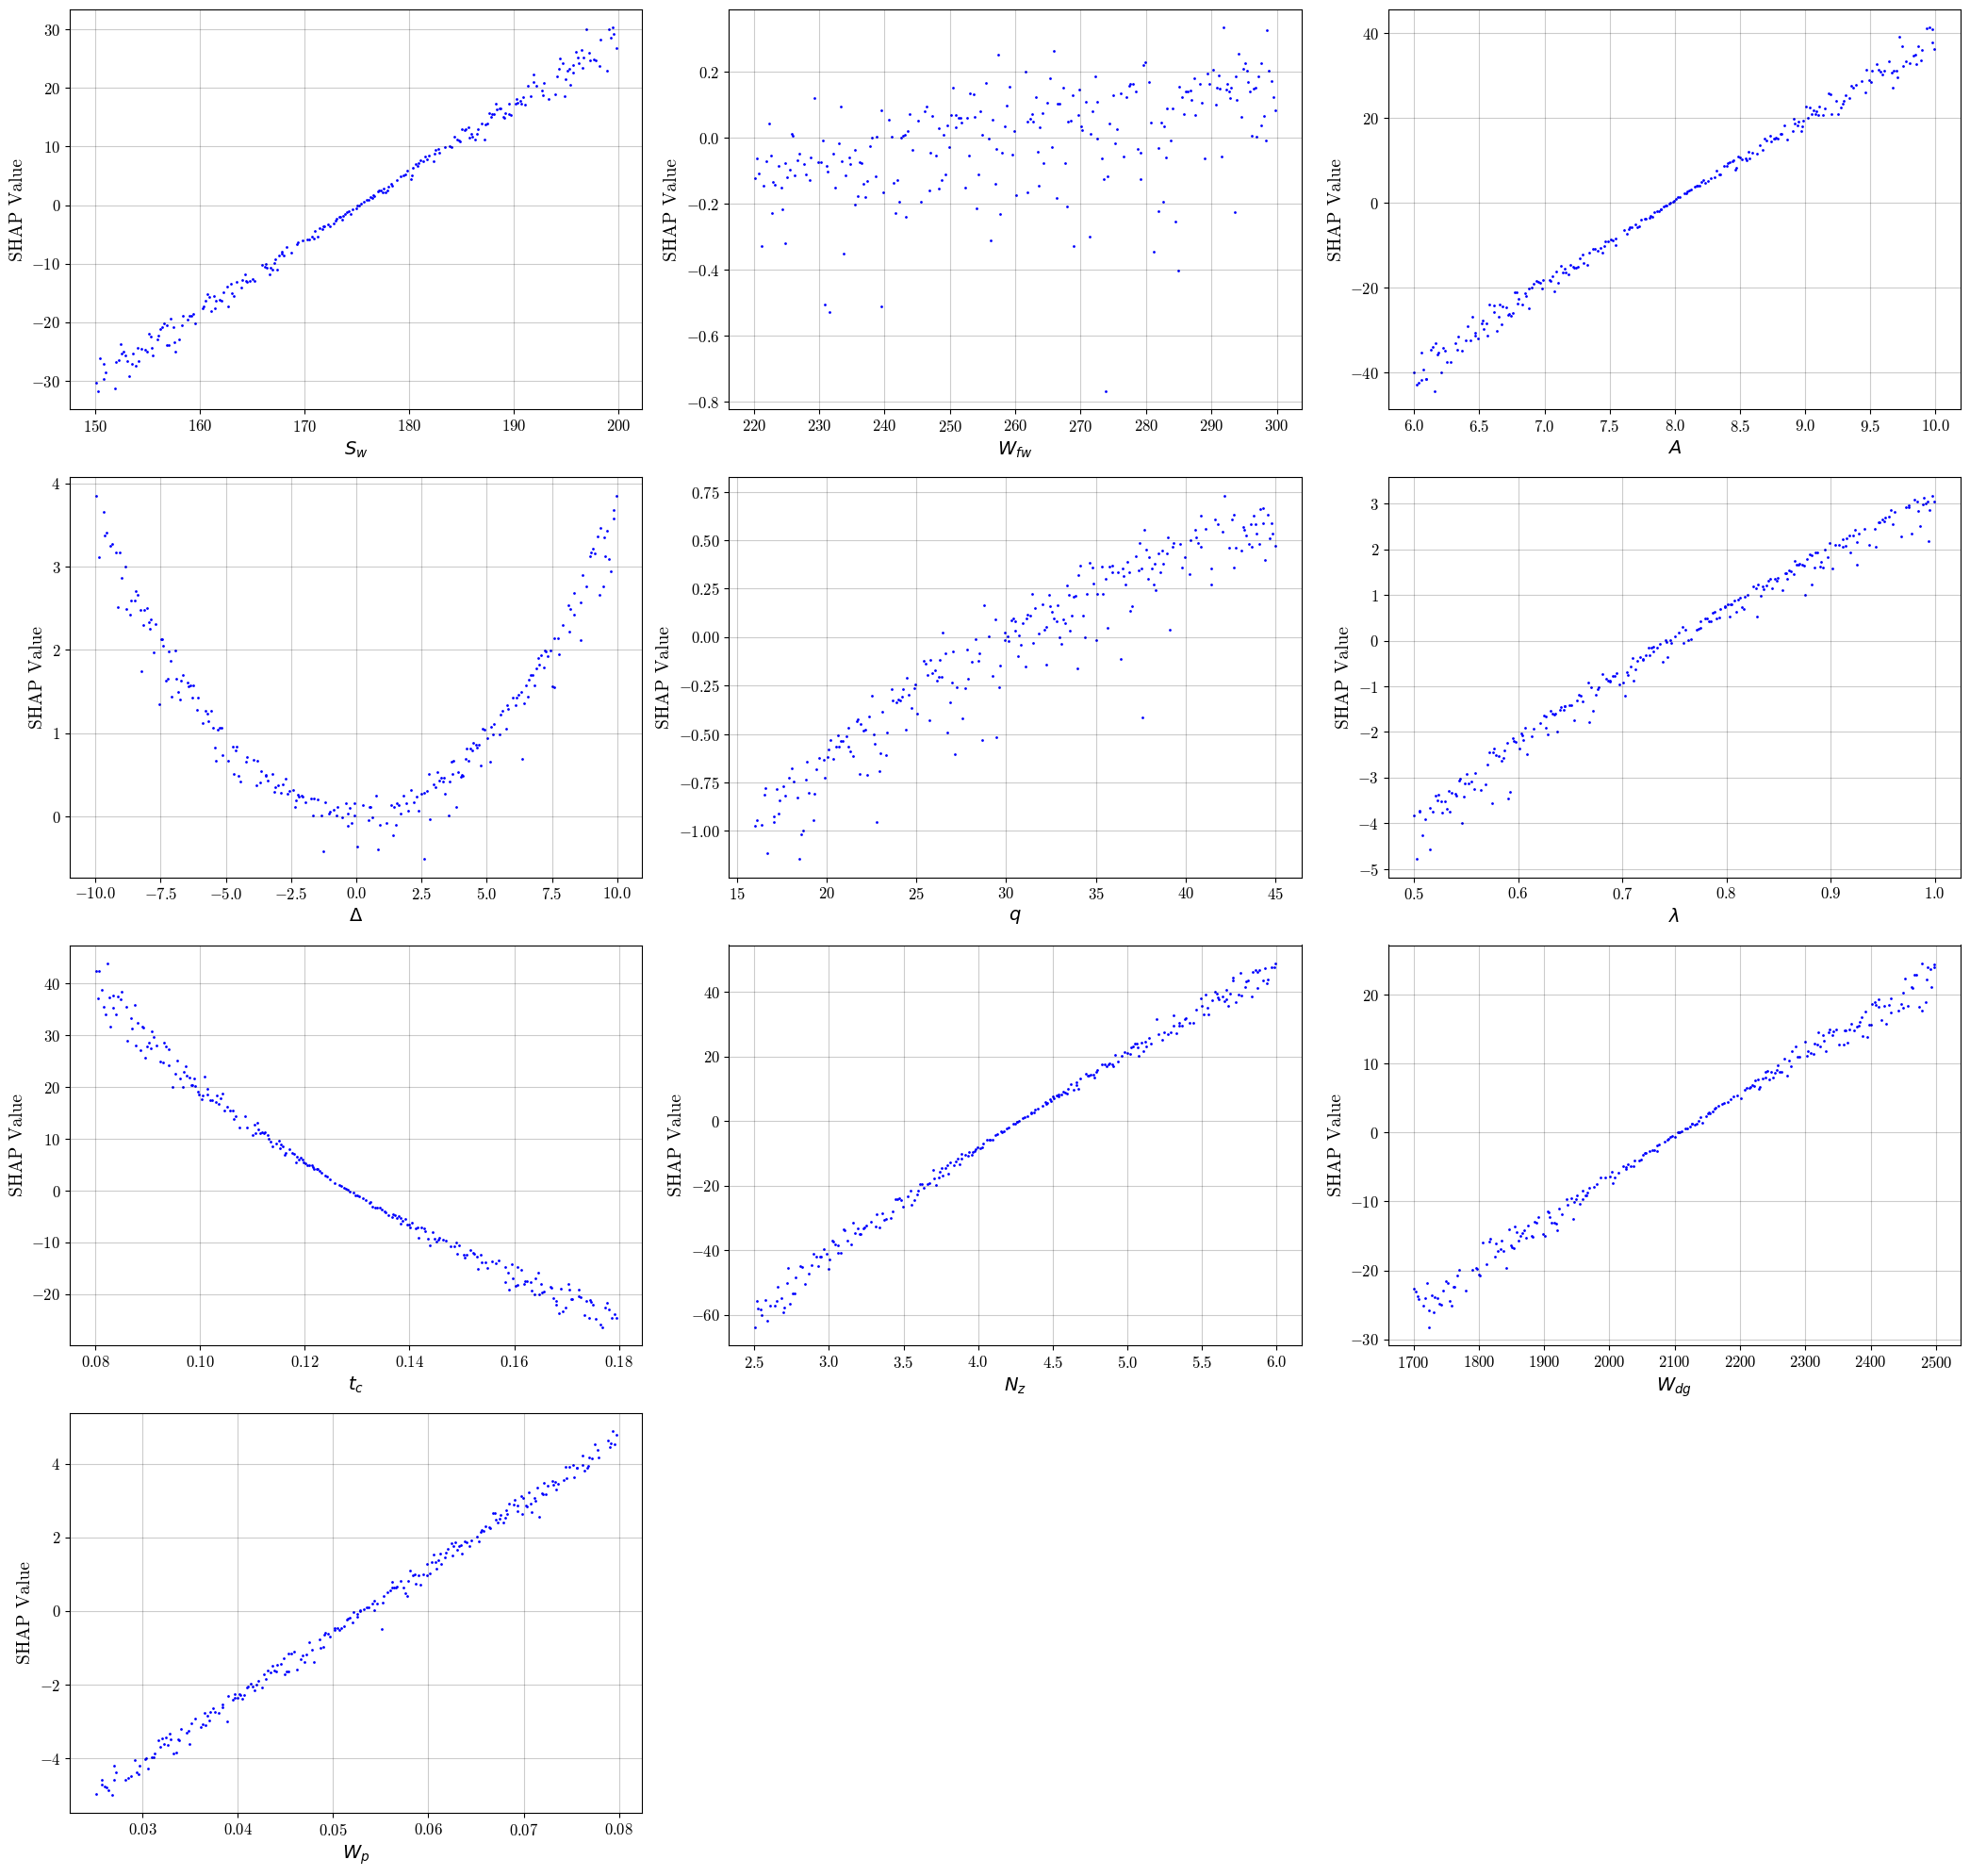

In [22]:
%%time
features = [i for i in range(X_tr.shape[1])]

explainer_train_true.dependence_plot(features)

CPU times: user 622 ms, sys: 43.3 ms, total: 665 ms
Wall time: 274 ms


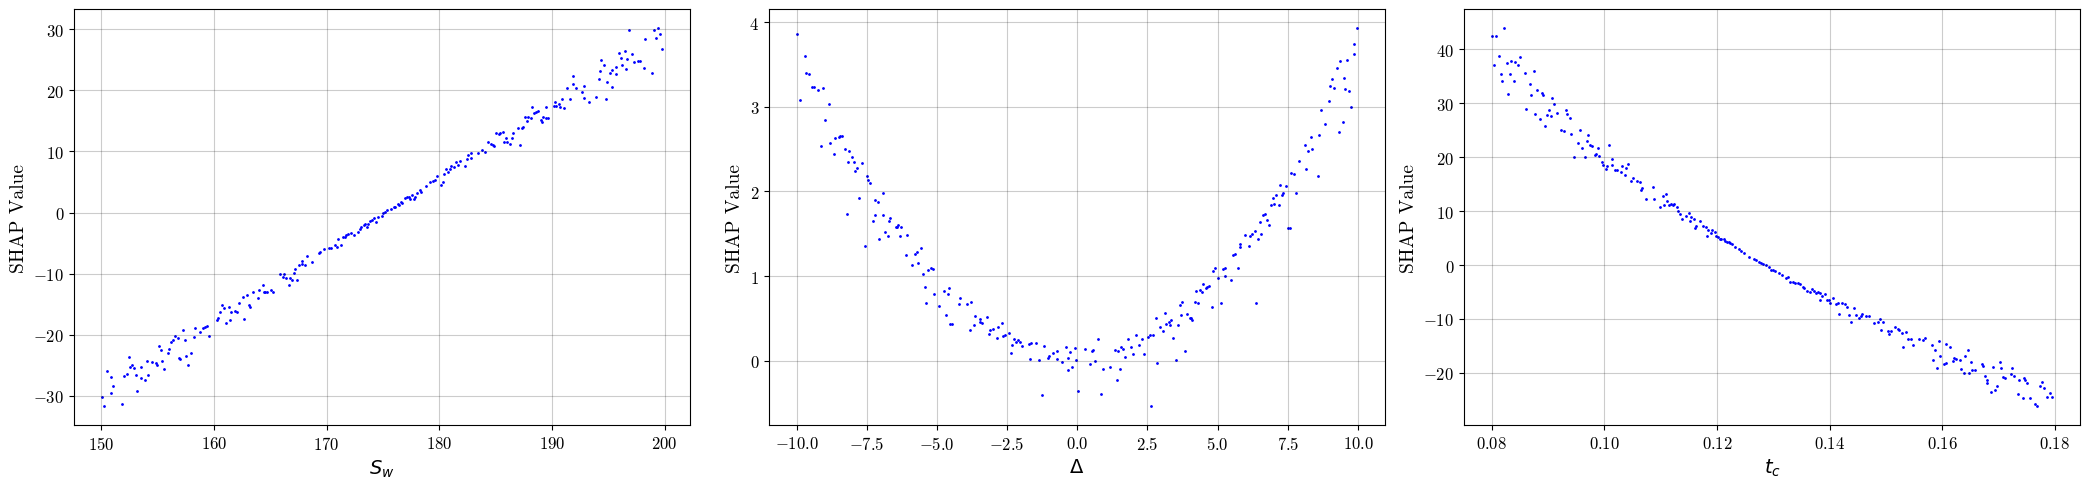

In [23]:
%%time
features = [0, 3, 6]

explainer_train.dependence_plot(features)

## 2 Dimension

### PDP

Using `PartialDependenceDisplay.from_surrogate_model` method
- Required parameters:
    - model: surrogate model. 
    - X: input spaces as a reference to create the partial dependence plot. 
    - features: list of feature index pairs to create the partial dependence plot on, i.e., y vs (x_{i}, x_{j})

- Config parameters:
    - centered: if True, the partial dependence plot starts from zero. 
    - grid_resolution: Resolution of the feature values. 
    - feature_names: name of the features for the axis. 
    - percentiles: start and end percentile of each feature when creating the plot. 

CPU times: user 1min 11s, sys: 26.7 s, total: 1min 38s
Wall time: 24.2 s


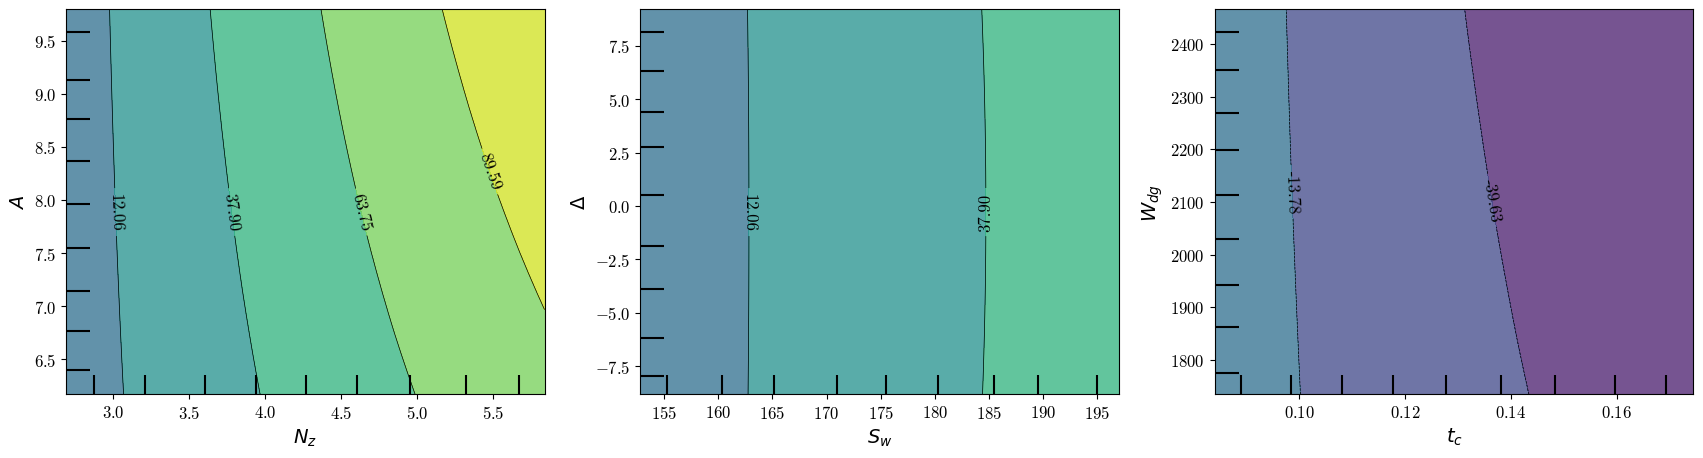

In [24]:
%%time

model = sm
X = X_tr
features = [(7, 2), (0, 3), (6, 8)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=20,
    kind="average",
    feature_names=feature_names,
    centered=True,
)

CPU times: user 1.16 s, sys: 45 ms, total: 1.21 s
Wall time: 1.35 s


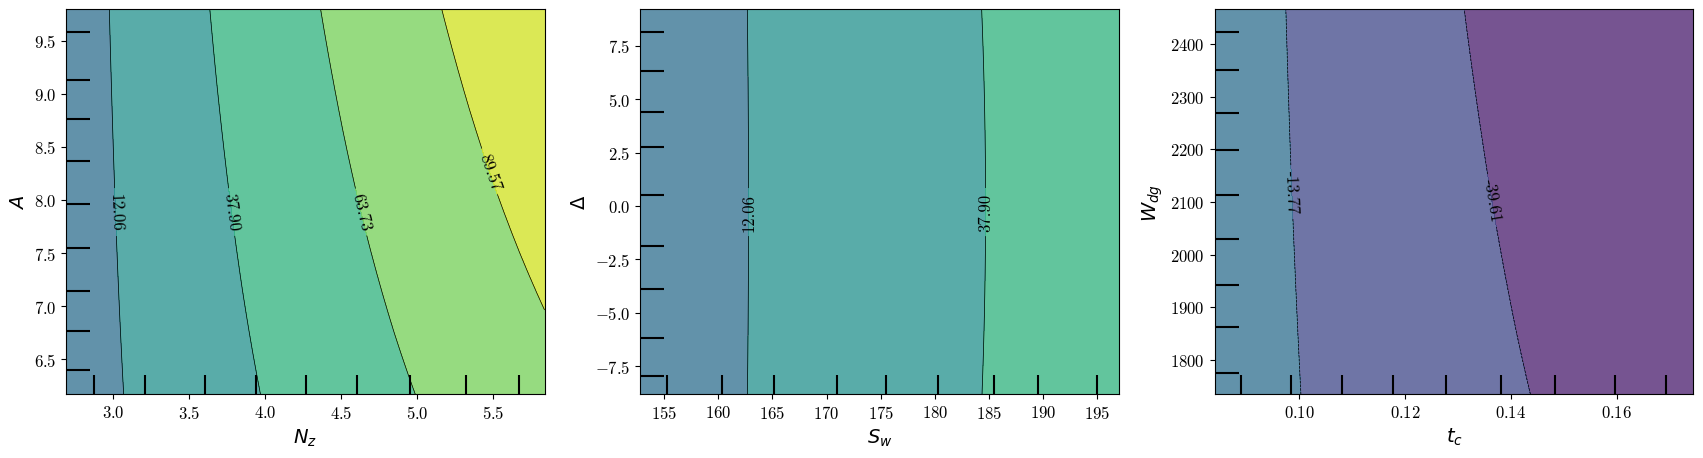

In [25]:
%%time

model = gtm
X = X_tr
features = [(7, 2), (0, 3), (6, 8)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=20,
    kind="average",
    feature_names=feature_names,
    centered=True,
)

CPU times: user 20.8 s, sys: 9.16 s, total: 30 s
Wall time: 7.25 s


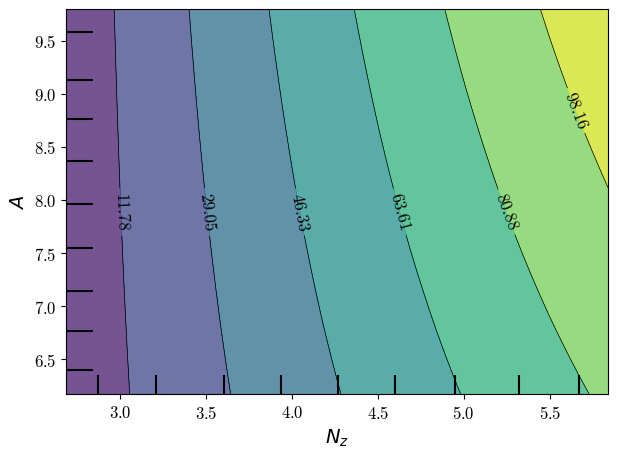

In [26]:
%%time

model = sm
X = X_tr
features = [(7, 2)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model,
    X,
    features,
    grid_resolution=20,
    kind="average",
    feature_names=feature_names,
    centered=True,
)

### SHAP

CPU times: user 359 ms, sys: 145 ms, total: 503 ms
Wall time: 263 ms


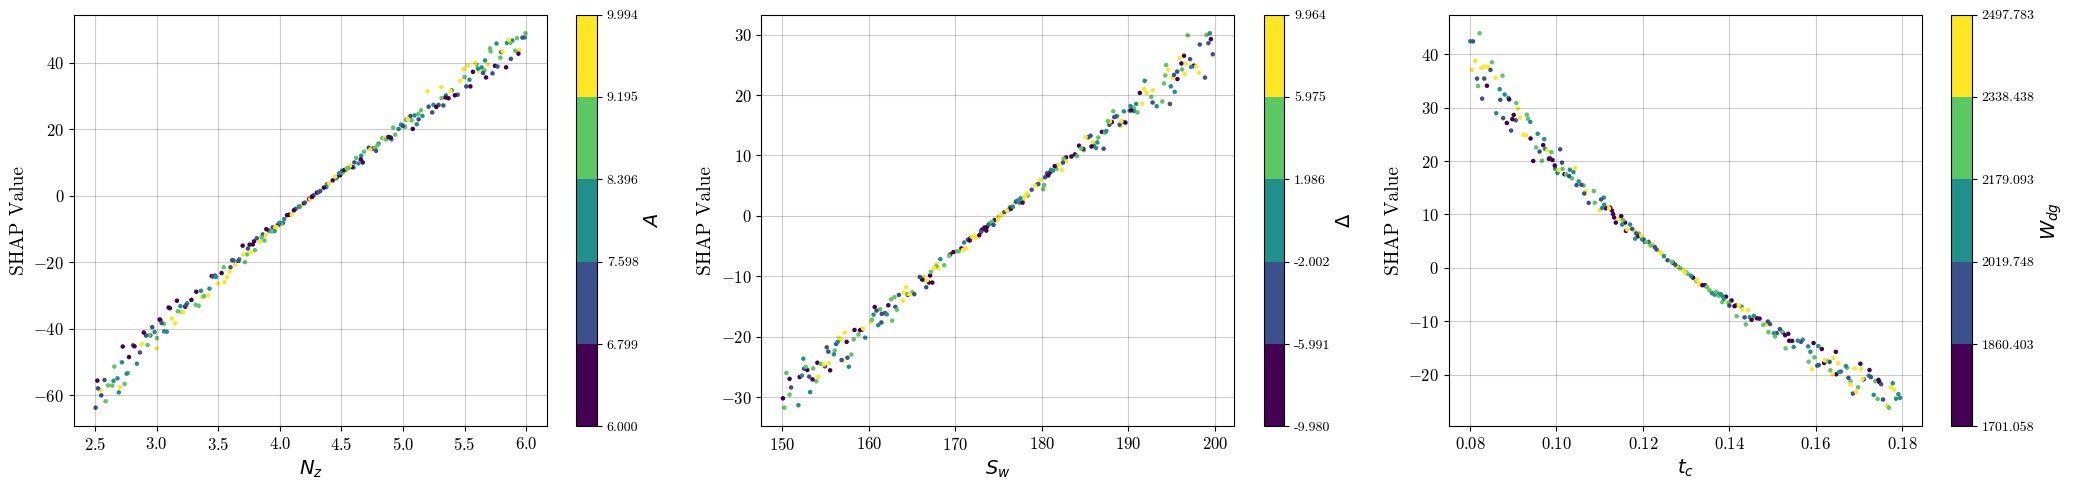

In [27]:
%%time
feature_pairs = [(7, 2), (0, 3), (6, 8)]
explainer_train.interaction_plot(
    feature_pairs,
    n_color=5,
)

CPU times: user 315 ms, sys: 281 ms, total: 595 ms
Wall time: 358 ms


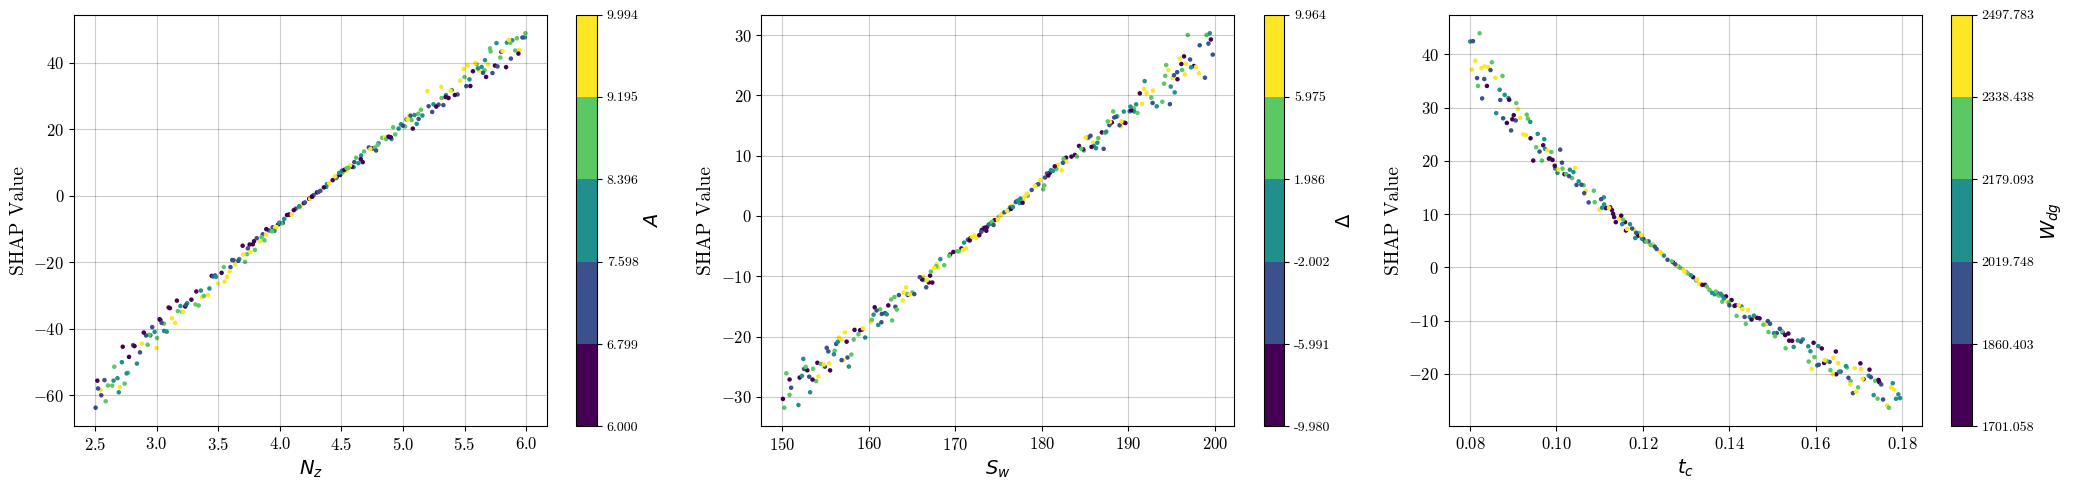

In [28]:
%%time
feature_pairs = [(7, 2), (0, 3), (6, 8)]
explainer_train_true.interaction_plot(
    feature_pairs,
    n_color=5,
)

CPU times: user 103 ms, sys: 39.2 ms, total: 142 ms
Wall time: 110 ms


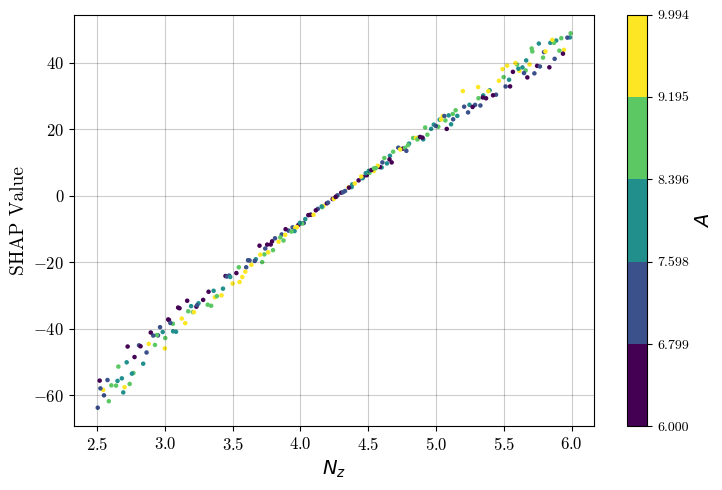

In [29]:
%%time
feature_pairs = [(7, 2)]
explainer_train.interaction_plot(
    feature_pairs,
    n_color=5,
)

# Other SHAP Plots

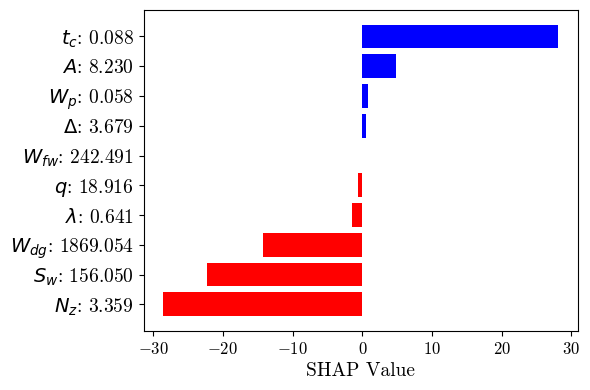

In [30]:
explainer_train.individual_plot(index=0)

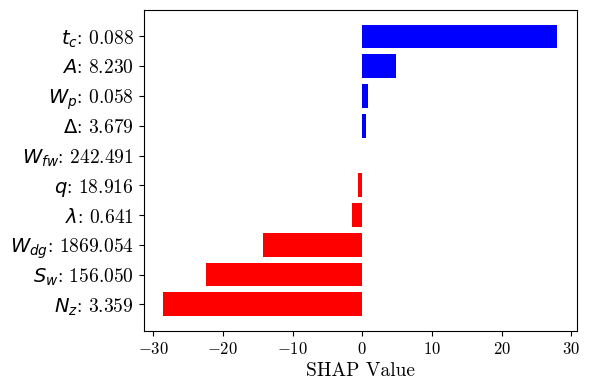

In [31]:
explainer_train_true.individual_plot(index=0)

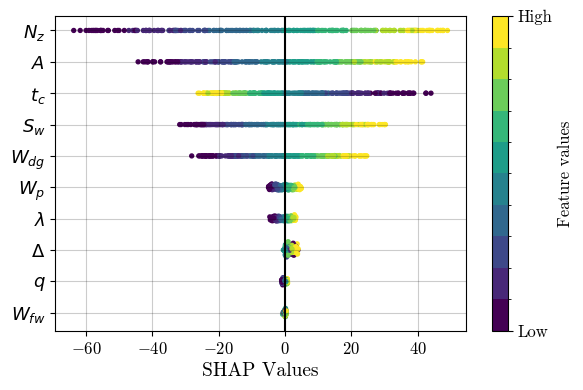

In [32]:
explainer_train.summary_plot()

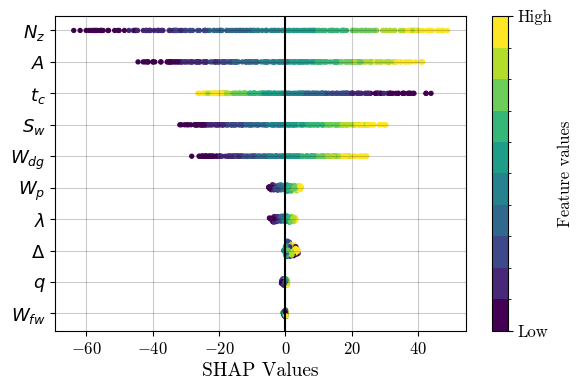

In [33]:
explainer_train_true.summary_plot()